In [1]:
#Importing all the required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,f1_score,precision_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#Reading the dataset
df=pd.read_csv('C:/Users/User/Documents/Data Trained/Data Science Class resources/DSData-master/loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
#Checking the null values(if any)
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
#We can drop Loan ID as it is not that much importance
df.drop(['Loan_ID'],inplace=True,axis=1)

In [9]:
for i in df:
    print(i)
    print(df[i].unique(),'\n')
    print(df[i].value_counts(),'\n')

Gender
['Male' 'Female' nan] 

Male      489
Female    112
Name: Gender, dtype: int64 

Married
['No' 'Yes' nan] 

Yes    398
No     213
Name: Married, dtype: int64 

Dependents
['0' '1' '2' '3+' nan] 

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64 

Education
['Graduate' 'Not Graduate'] 

Graduate        480
Not Graduate    134
Name: Education, dtype: int64 

Self_Employed
['No' 'Yes' nan] 

No     500
Yes     82
Name: Self_Employed, dtype: int64 

ApplicantIncome
[ 5849  4583  3000  2583  6000  5417  2333  3036  4006 12841  3200  2500
  3073  1853  1299  4950  3596  3510  4887  2600  7660  5955  3365  3717
  9560  2799  4226  1442  3750  4166  3167  4692  3500 12500  2275  1828
  3667  3748  3600  1800  2400  3941  4695  3410  5649  5821  2645  4000
  1928  3086  4230  4616 11500  2708  2132  3366  8080  3357  3029  2609
  4945  5726 10750  7100  4300  3208  1875  4755  5266  1000  3333  3846
  2395  1378  3988  2366  8566  5695  2958  6250  3273  4133  3620 

In [10]:
#As there are number of missing values we can drop them
df.dropna(inplace=True)

In [11]:
df.shape

(480, 12)

In [12]:
#Checking the null values(if any)
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

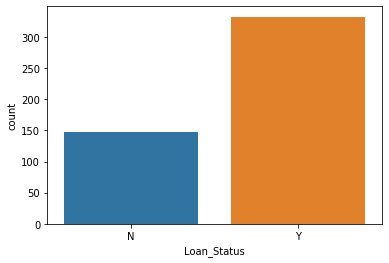

In [13]:
#Lets chcek the count of each type 
sns.countplot(x="Loan_Status",data=df)
plt.show()

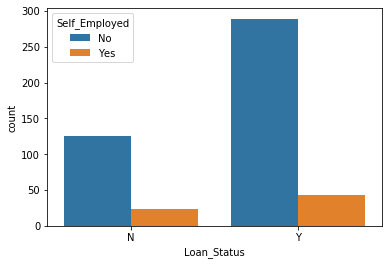

In [14]:
sns.countplot(x="Loan_Status",hue="Self_Employed",data=df)
plt.show()

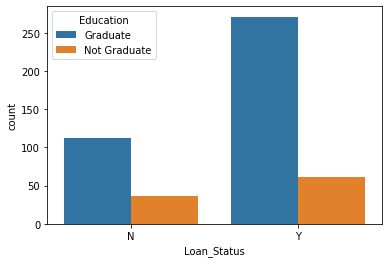

In [15]:
sns.countplot(x="Loan_Status",hue="Education",data=df)
plt.show()

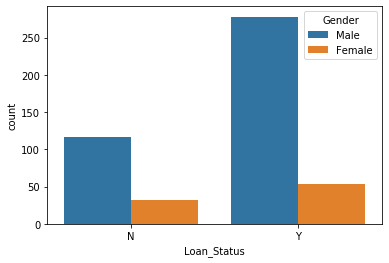

In [16]:
sns.countplot(x="Loan_Status",hue="Gender",data=df)
plt.show()

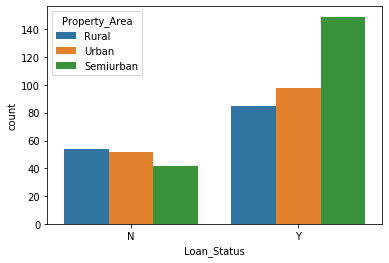

In [17]:
sns.countplot(x="Loan_Status",hue="Property_Area",data=df)
plt.show()

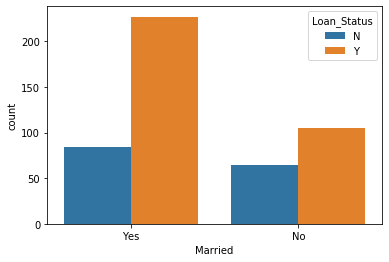

In [18]:
sns.countplot(x="Married",hue="Loan_Status",data=df)
plt.show()

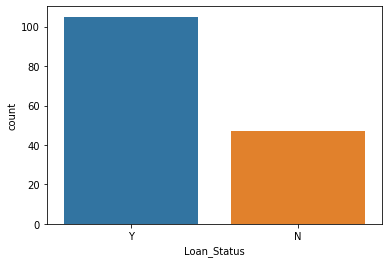

In [19]:
sns.countplot(x="Loan_Status",data=df.loc[df["ApplicantIncome"]>5000])
plt.show()

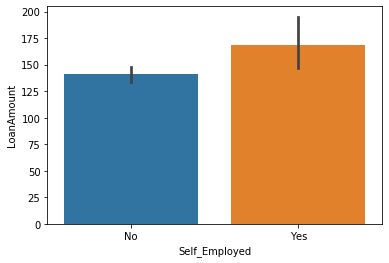

In [20]:
sns.barplot(y="LoanAmount",x="Self_Employed",data=df)
plt.show()

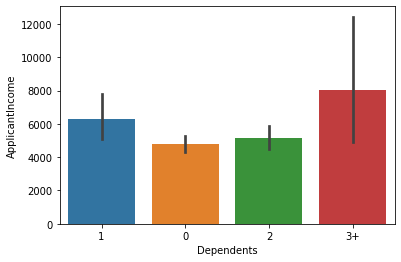

In [21]:
sns.barplot(y="ApplicantIncome",x="Dependents",data=df)
plt.show()

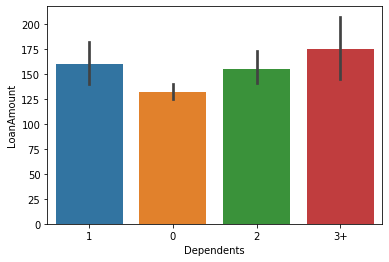

In [22]:
sns.barplot(y="LoanAmount",x="Dependents",data=df)
plt.show()

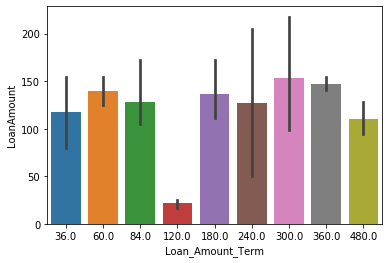

In [23]:
sns.barplot(x="Loan_Amount_Term",y="LoanAmount",data=df)
plt.show()

In [24]:
le=LabelEncoder()
df['Married']=le.fit_transform(df['Married'])
df['Gender']=le.fit_transform(df['Gender'])
df['Education']=le.fit_transform(df['Education'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

In [25]:
df= pd.get_dummies(df, drop_first=True)

In [26]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,1,0,0,0,0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,1,0,0,0,0,1
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,1,0,0,0,0,1
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1
5,1,1,0,1,5417,4196.0,267.0,360.0,1.0,1,0,1,0,0,1


In [27]:
#Separating the variables like indenpendent and the target variable
x=df.drop(columns=["Loan_Status"])
y=df[["Loan_Status"]]

In [28]:
#Splitting the data into 2 sets training and the test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=56,stratify=y)

In [29]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(384, 14) (96, 14)
(384, 1) (96, 1)


In [30]:
KNN=KNeighborsClassifier(n_neighbors=4)
SV=SVC()
LR=LogisticRegression()
DTC=DecisionTreeClassifier(random_state=5)
GNB=GaussianNB()
RFC=RandomForestClassifier()
GBC=GradientBoostingClassifier()
ABC=AdaBoostClassifier()

In [31]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DTC))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier',RFC))
models.append(('GradientBoostingClassifier',GBC))
models.append(('AdaBoostClassifier',ABC))

*********************** KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')


Accuracy_score =  0.6041666666666666


Cross_Val_Score =  0.5725448690114343


roc_auc_score =  0.5666666666666667


classification_report
               precision    recall  f1-score   support

           0       0.39      0.47      0.42        30
           1       0.73      0.67      0.70        66

    accuracy                           0.60        96
   macro avg       0.56      0.57      0.56        96
weighted avg       0.63      0.60      0.61        96



[[14 16]
 [22 44]]


F1_score= 0.6984126984126984


Precision_score= 0.7333333333333333


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** SVC ***********************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_sh

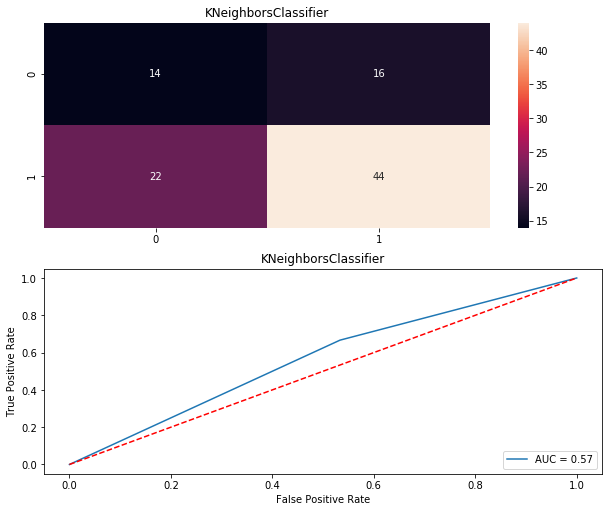

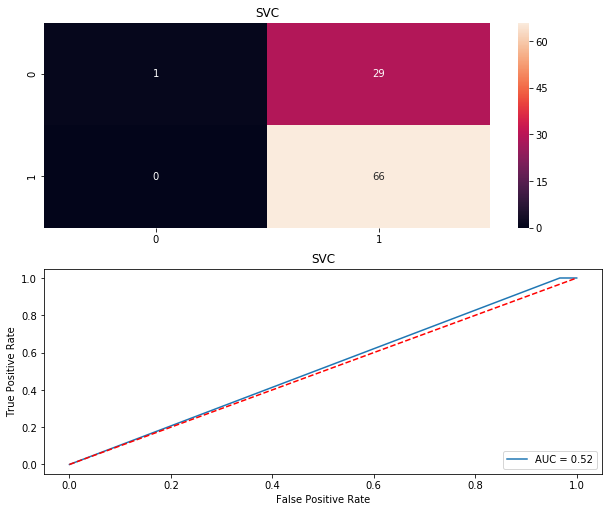

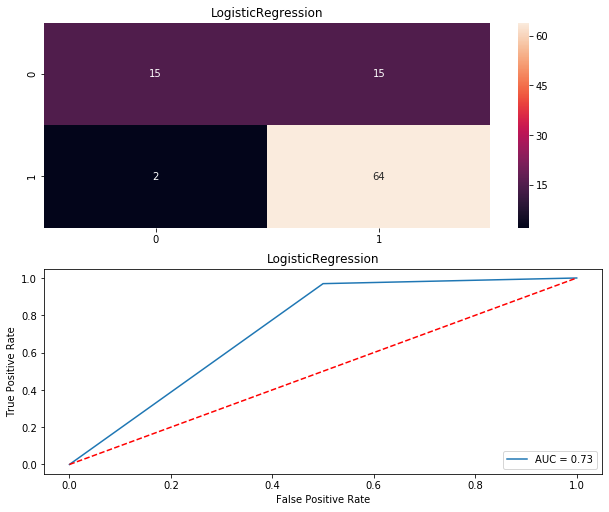

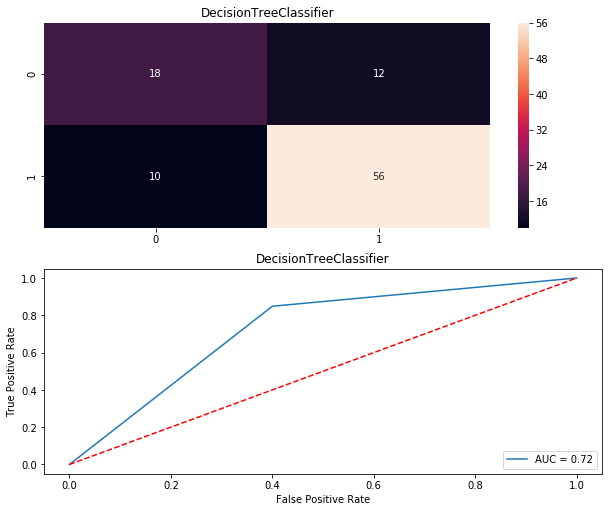

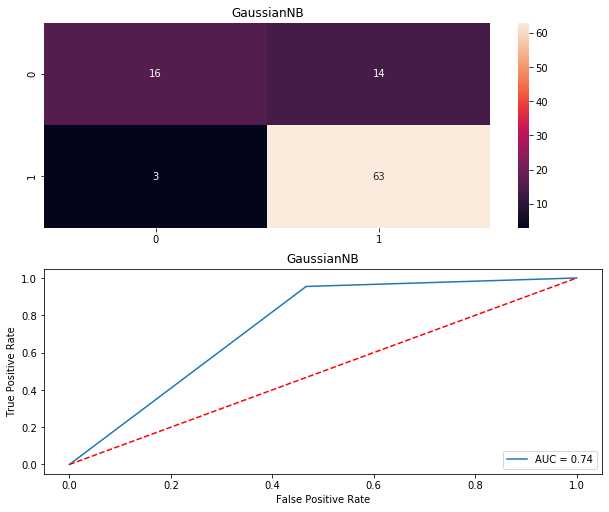

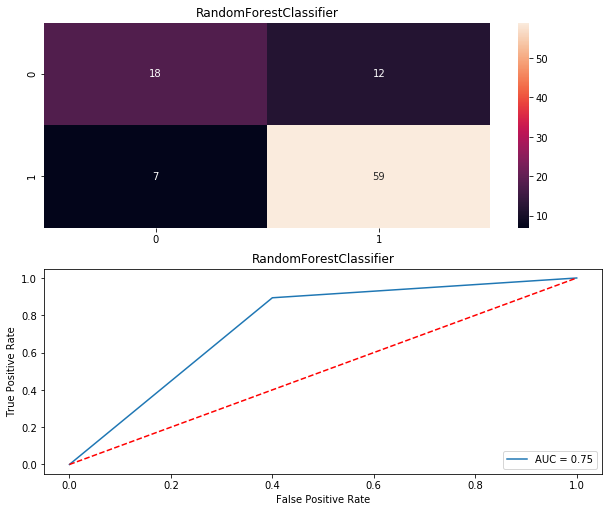

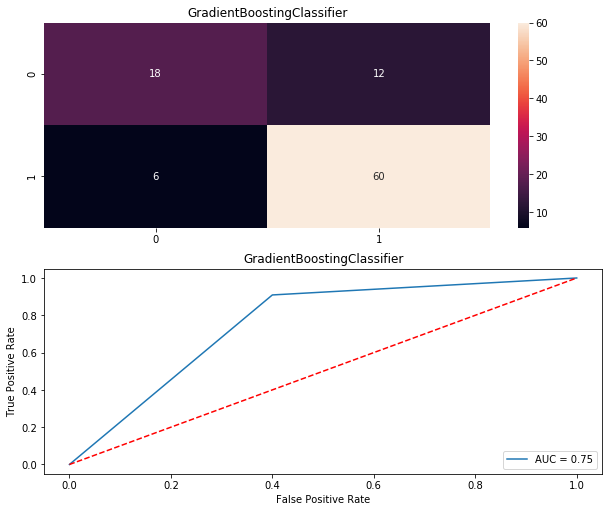

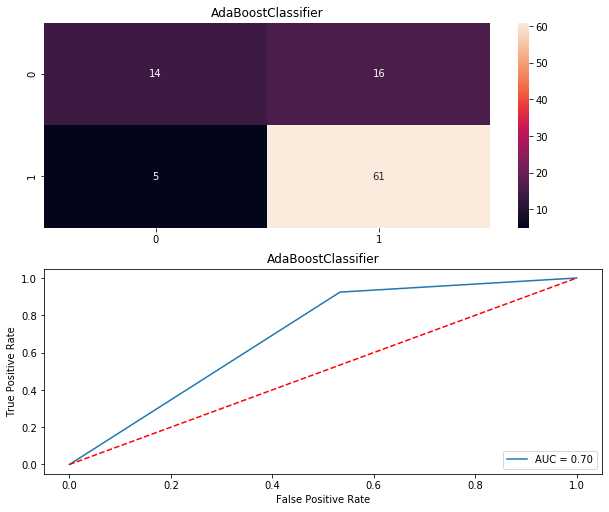

In [32]:
Model = []
score = []
cvs=[]
rocscore=[]
f1score=[]
ps=[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pred)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pred))
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    f1s=f1_score(y_test,pred)
    print('F1_score=',f1s)
    f1score.append(f1s*100)
    print('\n')
    precisionscore=precision_score(y_test,pred)
    print('Precision_score=',precisionscore)
    ps.append(precisionscore*100)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [33]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore,'F1_score':f1s,'Precision_score':ps})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve,F1_score,Precision_score
0,KNeighborsClassifier,60.416667,57.254487,56.666667,0.853147,73.333333
1,SVC,69.791667,69.586771,51.666667,0.853147,69.473684
2,LogisticRegression,82.291667,81.042662,73.484848,0.853147,81.012658
3,DecisionTreeClassifier,77.083333,71.457700,72.424242,0.853147,82.352941
4,GaussianNB,82.291667,78.537867,74.393939,0.853147,81.818182
5,RandomForestClassifier,80.208333,76.679874,74.696970,0.853147,83.098592
6,GradientBoostingClassifier,81.250000,78.763569,75.454545,0.853147,83.333333
7,AdaBoostClassifier,78.125000,78.333786,69.545455,0.853147,79.220779


In [34]:
#Lets use GridsearchCV for hyperparamenter tuning for Logistic Regression
def maxacc_score(regr,x,y):
    max_acc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.25,stratify=y)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        acc_scr=accuracy_score(y_test,y_pred)
        if acc_scr>max_acc_score:
            max_acc_score=acc_scr
            final_r_state=r_state
    print("max accuracy score corresponding to ",final_r_state," is ",max_acc_score)
    return final_r_state

In [37]:
pipeline=Pipeline([("ss",StandardScaler()),("LR",LogisticRegression())])
parameters = {"LR__max_iter":[5,8,10,14,17,19,23]}
clf = GridSearchCV(pipeline, parameters, cv=5,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

{'LR__max_iter': 5}

In [39]:
pipeline_LR=Pipeline([("ss",StandardScaler()),("LR",LogisticRegression(max_iter=5))])
maxacc_score(pipeline_LR,x,y)

max accuracy score corresponding to  50  is  0.8583333333333333


50

In [40]:
from sklearn.externals import joblib
joblib.dump(LR,"Fraud_Loan_LR.pkl")

['Fraud_Loan_LR.pkl']